# Fisher Score
***

In [43]:
from skfeature.function.similarity_based import fisher_score
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = load_breast_cancer()

In [68]:
X = data.data
y = data.target

In [5]:
RANK = fisher_score.fisher_score(X, y)

In [10]:
feature_imporatnces = pd.Series(RANK, index = data.feature_names)

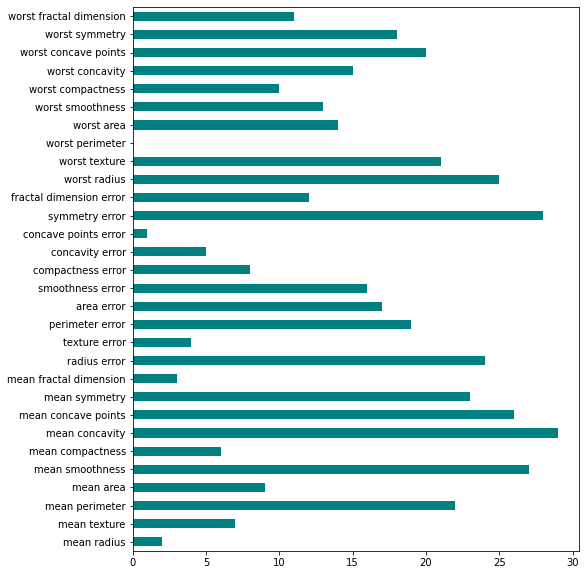

In [16]:
plt.figure(figsize = (8, 10))
feature_imporatnces.plot(kind = 'barh', color = 'teal')
plt.show()



# Mutual Information(상호정보량)

***

- 상호정보량은 **두 확률변수가 공유하는 엔트로피**라고 할 수 있다.
- 두 확률변수 X, y를 각각 보았을 때 보다 같이 보았을 때 얼마나 더 불확실성이 감소하는가를 정량화 한 지표

In [17]:
from sklearn.feature_selection import mutual_info_classif

In [69]:
X = pd.DataFrame(X, columns = data.feature_names)

In [70]:
MI = mutual_info_classif(X, y)

In [71]:
use_cols = data.feature_names[np.where(MI > 0.2)]

In [72]:
use_cols

array(['mean radius', 'mean perimeter', 'mean area', 'mean compactness',
       'mean concavity', 'mean concave points', 'radius error',
       'perimeter error', 'area error', 'worst radius', 'worst perimeter',
       'worst area', 'worst compactness', 'worst concavity',
       'worst concave points'], dtype='<U23')

In [60]:
from sklearn.feature_selection import SelectPercentile

In [73]:
SP = SelectPercentile(percentile = 50)
# 상호정보량 상위 50% feature select

In [74]:
sp_X = SP.fit_transform(X, y)

In [75]:
sp_X.shape

(569, 15)

In [76]:
SP.get_feature_names_out()

array(['mean radius', 'mean perimeter', 'mean area', 'mean compactness',
       'mean concavity', 'mean concave points', 'radius error',
       'perimeter error', 'area error', 'worst radius', 'worst perimeter',
       'worst area', 'worst compactness', 'worst concavity',
       'worst concave points'], dtype=object)